<a href="https://colab.research.google.com/github/Debo12/datascience.guvi-final-project/blob/master/Clustering_Credit_Marketing_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data From CSV File

In [42]:
df = pd.read_csv('/content/drive/MyDrive/Guvi/Final Project/Datasets/Credit Card_Clustering/Credit Card_Clustering.csv')

In [43]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Remove the Categorical Column

In [45]:
data = df.drop("CUST_ID", axis=1)

# Normalize the Data

In [46]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826016,-0.598688,NaN,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.36068


In [47]:
data = data.fillna(data.mean())

# Visualizing Relationship among Features

In [48]:
#sns.pairplot(data)

# Find Optimal no of Clusters using Silhouette Score

In [49]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)
    scores.append(silhouette_score(data, kmeans.labels_))

print(scores)

[0.2096368469769908, 0.24998015962986883, 0.19787914818546587, 0.1933889658890914, 0.2027790279748712, 0.21489032413878914, 0.22205258973133005, 0.22620756961544497, 0.2109912670161675]


In [50]:
max(scores)

0.24998015962986883

In [51]:
scores.index(max(scores))+2

3

Text(0, 0.5, 'Silhouette Score')

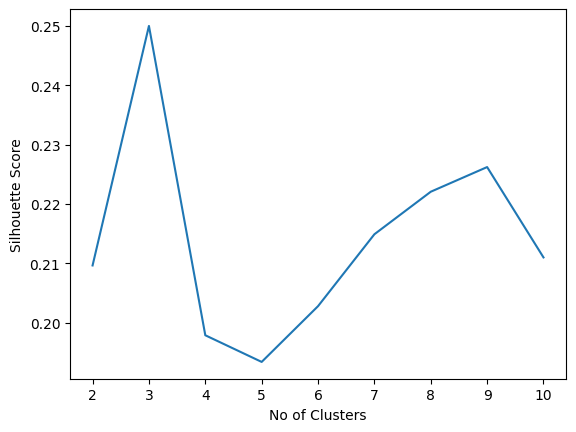

In [52]:
l = list(range(2, 11))
plt.plot(l, scores)
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Score')

#Find Optimal no of Clusters using Davies-Bouldin score

Note:- Only declining score, not good

In [53]:
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)
    db_scores.append(davies_bouldin_score(data, kmeans.labels_))

print(db_scores)

[1.91101220527931, 1.5939579659466208, 1.5743811485258152, 1.548622738919089, 1.505732257502787, 1.491194566662175, 1.361490288481404, 1.4738986120716056, 1.2698316188350094]


In [54]:
max(db_scores)

1.91101220527931

In [55]:
db_scores.index(max(db_scores))+2

2

Text(0, 0.5, 'DB Index')

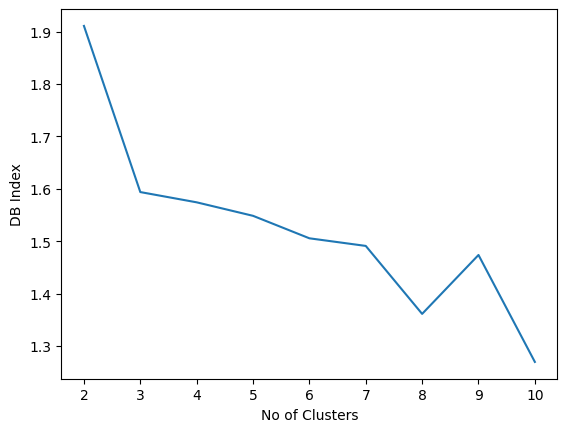

In [56]:
l = list(range(2, 11))
plt.plot(l, db_scores)
plt.xlabel('No of Clusters')
plt.ylabel('DB Index')

#Find Optimal no of Clusters using Calinski and Harabasz score
Note:- Only declining score, not good

In [57]:
ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)
    ch_scores.append(calinski_harabasz_score(data, kmeans.labels_))

print(ch_scores)

[1710.345773428197, 1608.182341147714, 1601.8363658639494, 1486.6545385829672, 1423.4314289926892, 1365.861921154053, 1336.7800979999224, 1279.7762691050757, 1280.141876465827]


Text(0, 0.5, 'CH Index')

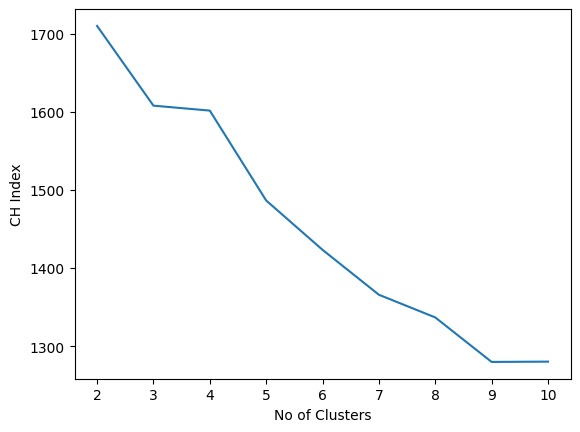

In [58]:
l = list(range(2, 11))
plt.plot(l, ch_scores)
plt.xlabel('No of Clusters')
plt.ylabel('CH Index')

# Apply k-means clustering with the optimal number of clusters

In [59]:
kmeans = KMeans(n_clusters=optimal_k, n_init=10)
kmeans.fit(data)

KMeans(n_clusters=3, n_init=10)

# Analyze the characteristics of each cluster

In [62]:
df["Cluster"] = kmeans.labels_

In [63]:
for i in range(optimal_k):
    cluster_data = df[df["Cluster"] == i]
    print(f"Cluster {i+1} has {len(cluster_data)} customers.")
    print(cluster_data.mean())
    print("\n")

Cluster 1 has 1590 customers.
BALANCE                             3978.572138
BALANCE_FREQUENCY                      0.957732
PURCHASES                            382.607453
ONEOFF_PURCHASES                     248.621031
INSTALLMENTS_PURCHASES               134.064201
CASH_ADVANCE                        3882.354049
PURCHASES_FREQUENCY                    0.231175
ONEOFF_PURCHASES_FREQUENCY             0.110994
PURCHASES_INSTALLMENTS_FREQUENCY       0.143109
CASH_ADVANCE_FREQUENCY                 0.448609
CASH_ADVANCE_TRX                      12.434591
PURCHASES_TRX                          5.534591
CREDIT_LIMIT                        6678.682104
PAYMENTS                            3022.407437
MINIMUM_PAYMENTS                    1752.483123
PRC_FULL_PAYMENT                       0.033902
TENURE                                11.345283
Cluster                                0.000000
dtype: float64


Cluster 2 has 6122 customers.
BALANCE                              803.135706
BALANCE_FRE

<ipython-input-63-12fde027e3df>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(cluster_data.mean())
<ipython-input-63-12fde027e3df>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(cluster_data.mean())
<ipython-input-63-12fde027e3df>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(c